### **0. Setup**

In [1]:
import os, glob, warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family': 'Arial', 'size': 15}
mpl.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
# my_pal = ['grey', 'mediumseagreen', 'dodgerblue']
# my_pal = ['grey', 'dodgerblue']
my_pal = ['grey', 'mediumseagreen', 'mediumblue', 'darkorange']

# set the directory where the data files are awaiting
directory = '/Users/ShokenLEE/Desktop/DATA/Common data spreadsheets/NE enrich score/AH-NLS'

### **1. Concanatate all the CSV files**

In [5]:
df = pd.DataFrame()

for path, subdirs, files in os.walk(directory):
#     print(subdirs)
    for file in files:
        if file.endswith('csv'):
            _df = pd.read_csv(os.path.join(path, file))
            _df['Path'] = path
            df = pd.concat([df, _df], axis=0)

In [6]:
df.head()
# df.tail()

,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio,Path
0,1,11-23-22 U2OSctrl AHSun2-mNGNLS DMSO 5min 488m...,504.900,272.632,1082.088,3.969,/Users/ShokenLEE/Desktop/DATA/Common data spre...
1,2,11-23-22 U2OSctrl AHSun2-mNGNLS DMSO 5min 488m...,696.341,438.000,1428.972,3.262,/Users/ShokenLEE/Desktop/DATA/Common data spre...
0,1,8-25-22 U2OSctr AH-mNG-NLS Propra 5min 488mNG ...,534.499,402.530,529.652,1.316,/Users/ShokenLEE/Desktop/DATA/Common data spre...
1,2,8-25-22 U2OSctr AH-mNG-NLS Propra 5min 488mNG ...,337.901,194.387,365.352,1.880,/Users/ShokenLEE/Desktop/DATA/Common data spre...
0,1,8-25-22 U2OSctr AH-mNG-NLS Prppra 5min 488mNG ...,303.826,167.157,324.507,1.941,/Users/ShokenLEE/Desktop/DATA/Common data spre...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 1
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   86 non-null     int64  
 1   FileName        86 non-null     object 
 2   Mean_whole      86 non-null     float64
 3   Mean_internal   86 non-null     float64
 4   Mean_periphery  86 non-null     float64
 5   Ratio           86 non-null     float64
 6   Path            86 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.4+ KB


### **2. Add columns**

####  **Drug**

In [14]:
df.loc[df['FileName'].str.contains('DMSO'), 'Drug'] = 'DMSO'
df.loc[df['FileName'].str.contains('pra'), 'Drug'] = 'Propranolol'

####  **siRNA**

In [6]:
df.loc[df['FileName'].str.contains('siCtrl'), 'siRNA'] = 'siCtrl'
df.loc[df['FileName'].str.contains('CTDNEP1'), 'siRNA'] = 'siCTDNEP1'
df.loc[df['FileName'].str.contains('Lpin1'), 'siRNA'] = 'siLpin1'
df.loc[df['FileName'].str.contains('NEP1R1'), 'siRNA'] = 'siNEP1R1'

####  **Plasmids**

In [5]:
df.loc[df['FileName'].str.contains('WT'), 'Plasmid'] = 'WT'
df.loc[df['FileName'].str.contains('HA'), 'Plasmid'] = 'H426A'

### **3. Cleaning**

####  **Drop zero value rows**

In [15]:
df_not_zero = df[df['Mean_whole'] !=0]

In [16]:
df_not_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   86 non-null     int64  
 1   FileName        86 non-null     object 
 2   Mean_whole      86 non-null     float64
 3   Mean_internal   86 non-null     float64
 4   Mean_periphery  86 non-null     float64
 5   Ratio           86 non-null     float64
 6   Path            86 non-null     object 
 7   Drug            86 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 6.0+ KB


### **4. Analysis**

#### **4-0. Quick check of the # of cells and mean values of NE enrichment score**

#### Number of cells

In [33]:
df_n_cells = df_not_zero.groupby(['Drug']).size()
df_n_cells.to_excel(directory + '/n_of_cells.xlsx', index_label=False)
df_n_cells

Drug
DMSO           37
Propranolol    49
dtype: int64

#### NE enrichment score - Mean

In [13]:
df_not_zero.groupby(['Plasmid'])['Ratio'].mean()

Plasmid
H426A    1.351630
WT       0.995111
Name: Ratio, dtype: float64

#### **4-1. Graphs**

In [25]:
# group options
group_name_options = ['Drug', 'siRNA', 'Plasmid']
group_order_options = {'Drug': ['DMSO', 'Propranolol'],
                      'siRNA': ['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'],
                      'Plasmid': ['WT', 'H426A']}

# Define group names
option_number = 0
group_name = group_name_options[option_number]
group_order = group_order_options[group_name]

#### **Number of cell counts per sample**

[Text(0, 0, 'DMSO'), Text(1, 0, 'Propranolol')]

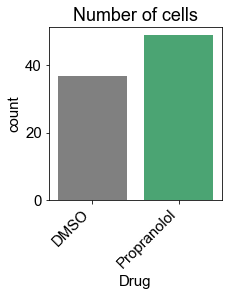

In [26]:
fig_width, fig_height = 3.0, 3.0
fig = plt.figure(figsize=(fig_width,fig_height))
ax_count = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_count = sns.countplot(data=df_not_zero, x=group_name, order=group_order, palette=my_pal)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of cells')
ax_count.set_xticklabels(labels=group_order, rotation=45, ha='right')

#### **NE enrichment score**

#### Box plot

[Text(0, 0, 'DMSO'), Text(1, 0, 'Propranolol')]

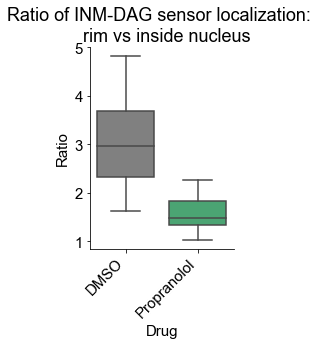

In [29]:
fig = plt.figure(figsize=(2.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x=group_name, y='Ratio',
                     order = group_order, palette=my_pal)

plt.title('Ratio of INM-DAG sensor localization: \n  rim vs inside nucleus')
plt.ylabel('Ratio')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=group_order, rotation=45, ha='right')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [30]:
fig.savefig(directory + '/NEenrichScore_AH-NLS_propranolol.pdf', bbox_inches='tight', transparent=True)

#### Displot

Text(0.5, 1.0, 'Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

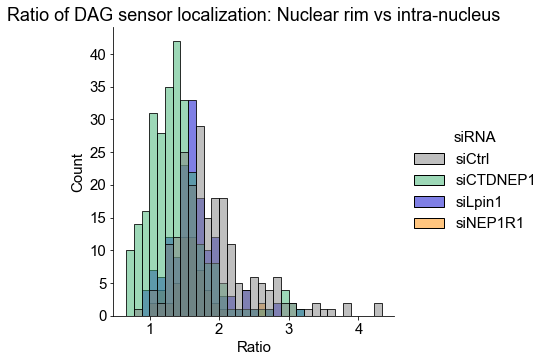

In [11]:
hist = sns.displot(data=df_not_zero, x='Ratio', 
                   hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

#### Violin plot

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

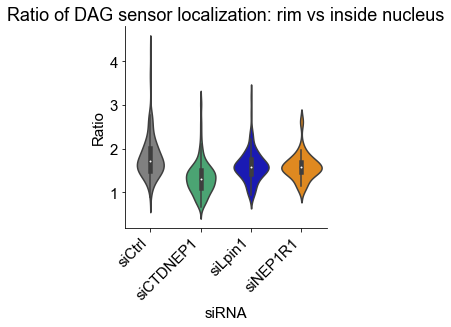

In [56]:
fig = plt.figure(figsize=(3.5,3.5))
ax_vio = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_vio = sns.violinplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_vio.spines['top'].set_visible(False)
ax_vio.spines['right'].set_visible(False)
ax_vio.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [20]:
fig.savefig(directory + '/Ratio_violin.jpg', bbox_inches='tight')

#### **Overall mean intensity in nucleus**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

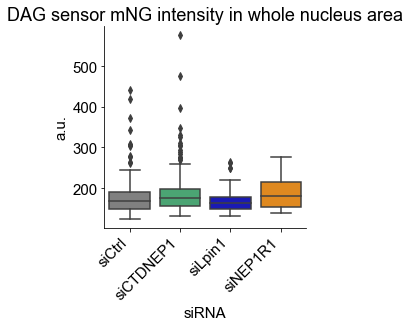

In [18]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Mean_whole', 
                     order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('DAG sensor mNG intensity in whole nucleus area')
plt.ylabel('a.u.')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [23]:
fig.savefig(directory + '/Mean_whole.pdf', bbox_inches='tight', transparent=True)

#### **Correlation b/w whole mean intensity and NE enrichment score**

#### Limited to those with mean_whole less than 300

(124.653, 300.0)

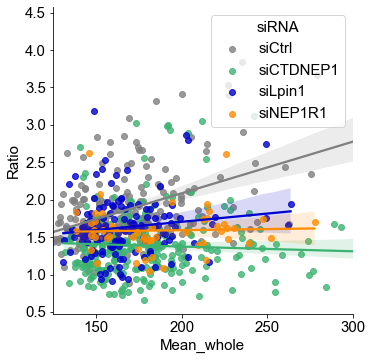

In [19]:
scatter = sns.lmplot(x='Mean_whole', y='Ratio', data=df_not_zero, 
                     hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], 
                     palette=my_pal, legend_out=False)

min = np.min(df_not_zero['Mean_whole'])
plt.xlim([min,300])

In [25]:
scatter.savefig(directory + '/Mean_vs_Ratio_scatter.jpg', bbox_inches='tight')

#### **Tukey HSD test**

In [14]:
res = pairwise_tukeyhsd(df['Ratio'], df['Plasmid'], alpha=0.05)

In [15]:
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 H426A     WT  -0.3633 0.001 -0.5242 -0.2024   True
---------------------------------------------------
